# AI Algoithms - Final Project
By: Tejas Vyas

## Scam job classification using NLP and Machine Learning


## Data Loading, EDA, Pre-processing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
# fake_job_postings.csv is our data file - loading it into pandas and verifying its loaded correctly
df = pd.read_csv('fake_job_postings.csv')
print("Data shape - ",df.shape)
df.head(3)

Data shape -  (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


We need to check if the data contains any null values so we can clean it up

In [3]:
#check null values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

It looks like we have null values, but nothing in our core label - fraudulent. Lets check all column info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

Above, we can see the list of columns we have in the dataset. It appears we keep track of postings using the job id and title which are non null, and then we have several identifiers which include job posting details, with our final label is **fraudulent** which is telling us the whether the job is valid or scam.

The dataset contains fpllowing columns:

- job_id: Unique ID
- title: The title of the job ad entry
- location: Geographical location of the job ad
- department: Corporate department (e.g. sales)
- salary_range: Indicative salary range (e.g. 50,000-60,000)
- company_profile: A brief company description
- description: The details description of the job ad
- requirements: Enlisted requirements for the job opening
- benefits: Enlisted offered benefits by the employer
- telecommuting: True for telecommuting positions
- has_company_logo: True if company logo is present
- has_questions: True if screening questions are present
- employment_type: Full-time, Part-time, Contract etc.
- required_experience: Executive, Internship etc.
- required_education: Doctorate, Masters, Bachelors
- industry: Automotive, Healthcare, IT etc.
- function: Research, Engineering etc.
- fraudulent: target label - 1 if scam, 0 if real

Right away, we can understand job_id is just an index and therefore not needed for our evaluation

In [5]:
df = df.drop(columns=['job_id'])

Lets review some statistics

In [6]:
df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


Our data is primarily distinguished between Text and Categorical Features, lets divide them and review

In [7]:
text_df = df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
text_df = text_df.fillna(' ')
text_df.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [8]:
cat_df = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
cat_df = cat_df.fillna("None")
cat_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,None,None,Marketing,0
1,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0
2,0,1,0,None,None,None,None,None,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Lets see how the target label is distributed

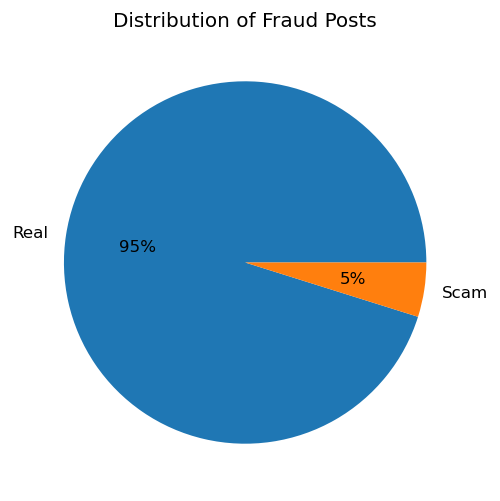

In [9]:
plt.figure(figsize=(5,5), dpi=120)
real = len(df[df['fraudulent'] == 0])
scam = len(df[df['fraudulent'] == 1])
plt.pie(x=[real,scam], explode=(0, 0), labels=['Real', 'Scam'], autopct='%1.0f%%', shadow=False)
plt.title('Distribution of Fraud Posts')
plt.show()

Our data is extremely skewed, generally tending towards real job posts

#### General Correlation Heatmap
To get a sense of how our columns behave with each other, lets do some correlation mapping

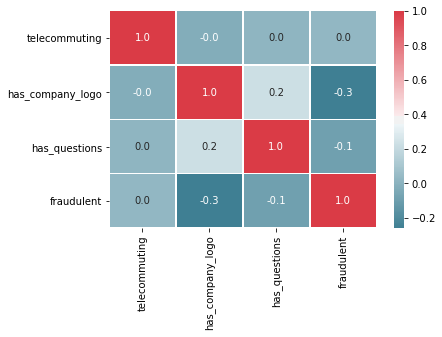

In [10]:
plt.figure()
cmap = sns.diverging_palette( 220, 10, as_cmap=True)
sns.heatmap(np.round(df.corr(),2), annot = True, linewidths=.5, fmt='.1f', cmap=cmap)
plt.show()

It appears none of the int columns have direct correlation so lets continue digging deeper.

Lets run some plots comparing columns to get some idea about our distribution

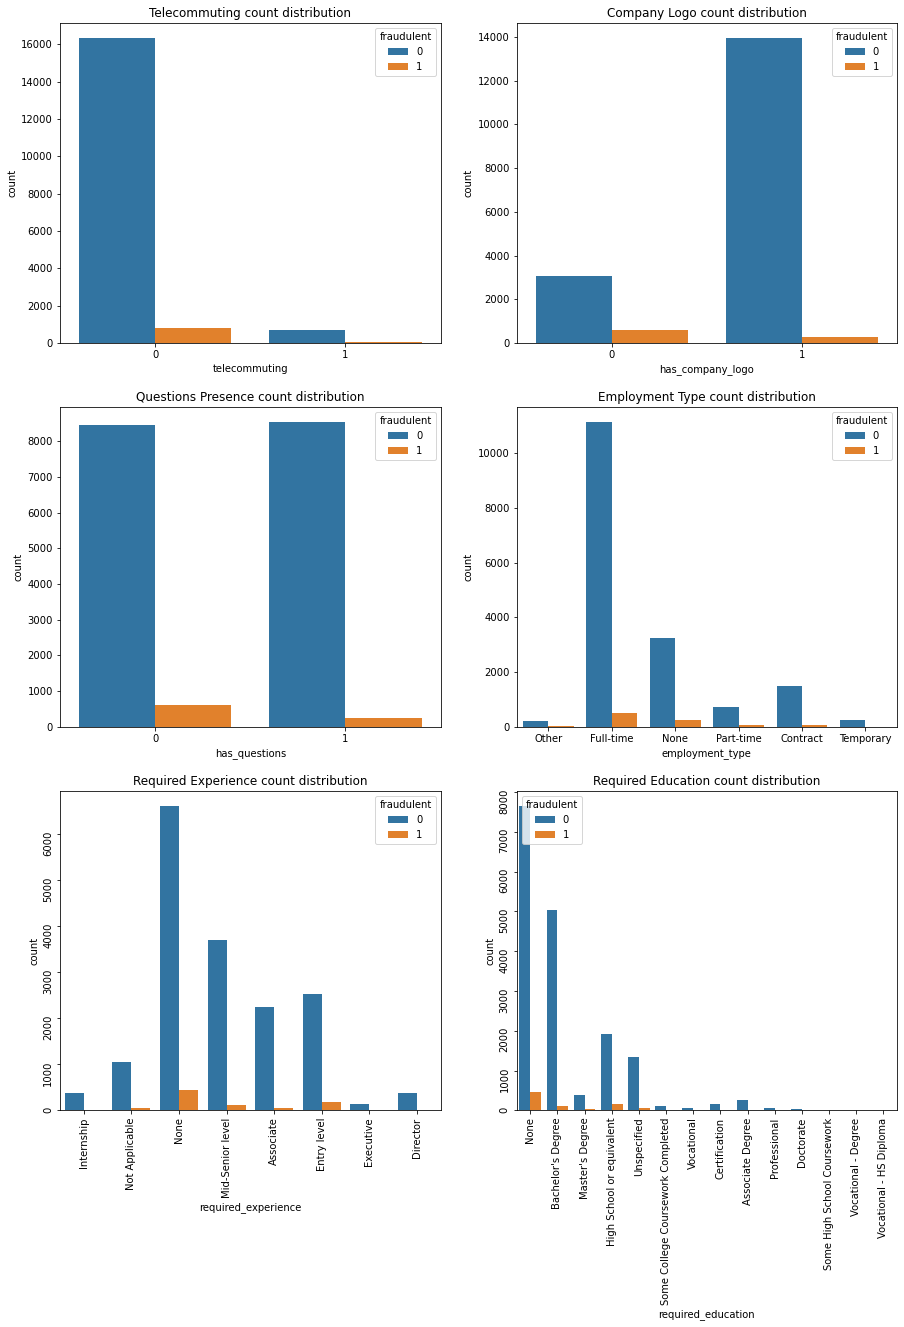

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(15,20))
sns.countplot(x='telecommuting', data=cat_df, hue='fraudulent', ax=ax[0,0])
ax[0,0].set_title("Telecommuting count distribution")
sns.countplot(x='has_company_logo', data=cat_df, hue='fraudulent', ax=ax[0,1]) 
ax[0,1].set_title("Company Logo count distribution")
sns.countplot(x='has_questions', data=cat_df, hue='fraudulent', ax=ax[1,0])
ax[1,0].set_title("Questions Presence count distribution")
sns.countplot(x='employment_type', data=cat_df, hue='fraudulent', ax=ax[1,1])
ax[1,1].set_title("Employment Type count distribution")
sns.countplot(x='required_experience', data=cat_df, hue='fraudulent', ax=ax[2,0])
ax[2,0].tick_params(labelrotation=90)
ax[2,0].set_title("Required Experience count distribution")
sns.countplot(x='required_education', data=cat_df, hue='fraudulent', ax=ax[2,1])
ax[2,1].tick_params(labelrotation=90)
ax[2,1].set_title("Required Education count distribution")
plt.show();

While we can see the relationships in the graphs above, it appears company logo being absent is one of the bigger tells of scam posts

We can plot some pair plots to see if there's any relationship present

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

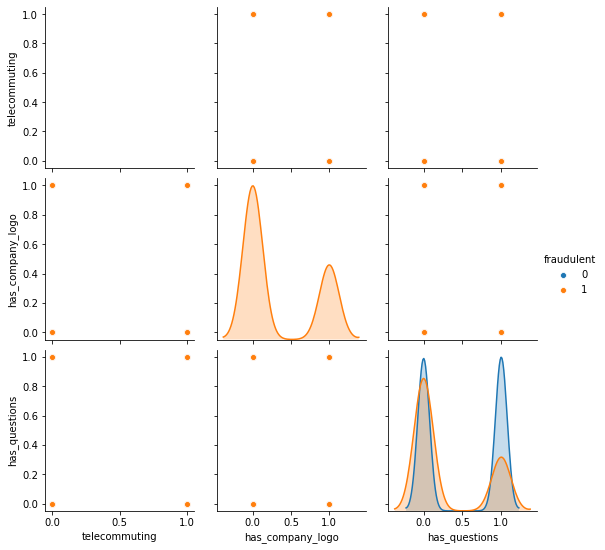

In [15]:
plt.figure()
sns.pairplot(df, hue='fraudulent')
plt.show()

It appears lack of questions is also one of the tells of a scam job posting

We can check for outliers now

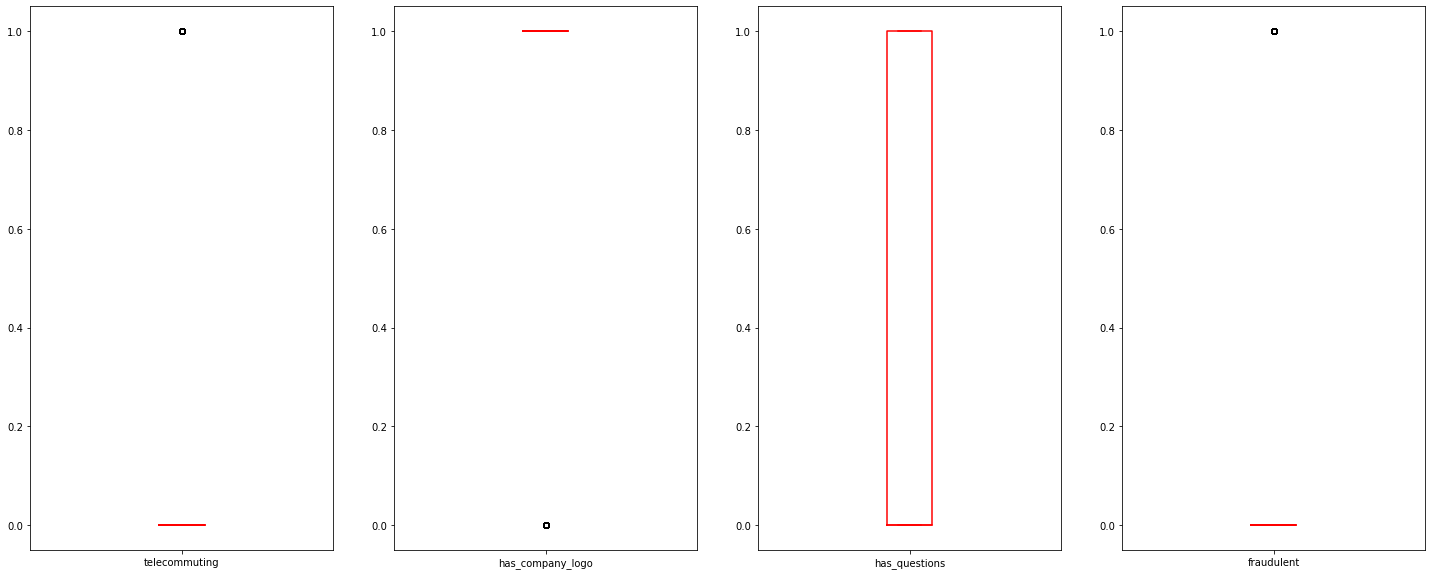

In [16]:
df.plot(kind="box",subplots=True, sharex=False, figsize=(25,10), sharey=False, 
        color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
         boxprops=dict(linestyle='-', linewidth=1.5),
         flierprops=dict(linestyle=' ', linewidth=1.5),
         medianprops=dict(linestyle='-', linewidth=1.5),
         whiskerprops=dict(linestyle='-', linewidth=1.5),
         capprops=dict(linestyle='-', linewidth=1.5),)
plt.show()

In the few int columns, it is clear we don't have outliers, which makes sense considering these are binary fields.

#### Text Preprocessing and NLP Feature Generation

To get some features out of the text, we combine all text columns together, remove punctuation, tokenize and remove stopwords

In [17]:
data = pd.DataFrame(columns=['text','target'])
data.text = text_df[text_df.columns[0:-1]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
data.target = df['fraudulent']

import string
def remove_punct(text):
  text_nopunct= "".join ([char for char in text if char not in string.punctuation])
  return text_nopunct
data.text=data.text.apply(lambda x:remove_punct(x))

import re
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens
data.text=data.text.apply(lambda x: tokenize(x.lower()))

import nltk
#nltk.download('stopwords')

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopword]
  return text
def join_text(text):
    joined_text = ' '.join(text)
    return joined_text

data.text=data.text.apply(lambda x: remove_stopwords(x))
data.text=data.text.apply(lambda x : join_text(x))
data.head()

,text,target
0,marketing internwere food52 weve created groun...,0
1,customer service cloud video production90 seco...,0
2,commissioning machinery assistant cmavalor ser...,0
3,account executive washington dcour passion imp...,0
4,bill review managerspotsource solutions llc gl...,0


Now we can review some word clouds

(-0.5, 799.5, 1599.5, -0.5)

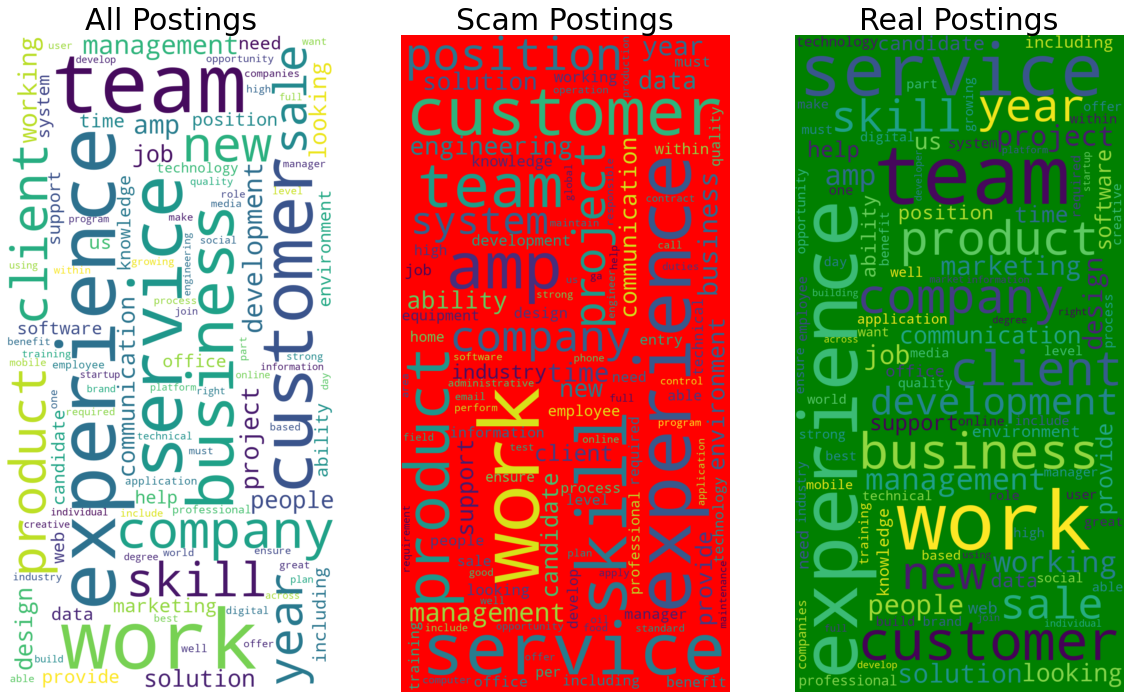

In [18]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

all_df1 = data[['text', 'target']]
all_df1['target'] = all_df1['target'].astype(int)
df_1 = all_df1[all_df1['target']==1]
df_0 = all_df1[all_df1['target']==0]
rev_All = " ".join(text for text in all_df1.text)
rev_1 = " ".join(text for text in df_1.text)
rev_0 = " ".join(text for text in df_0.text)

fig, ax = plt.subplots(1, 3, figsize  = (20,15))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(width=800, height=1600, max_font_size=200,collocations=False, max_words=100, background_color="white").generate(rev_All)
wordcloud_1 = WordCloud(width=800, height=1600, max_font_size=200,collocations=False, max_words=100, background_color="red").generate(rev_1)
wordcloud_0 = WordCloud(width=800, height=1600, max_font_size=200,collocations=False, max_words=100, background_color="green").generate(rev_0)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Postings', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Scam Postings',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Real Postings',fontsize=30)
ax[2].axis('off')

Above we can see word distributions are pretty similar

#### N-Gram Analysis
We can do some n-gram analysis now to check how the word distribution is occurring

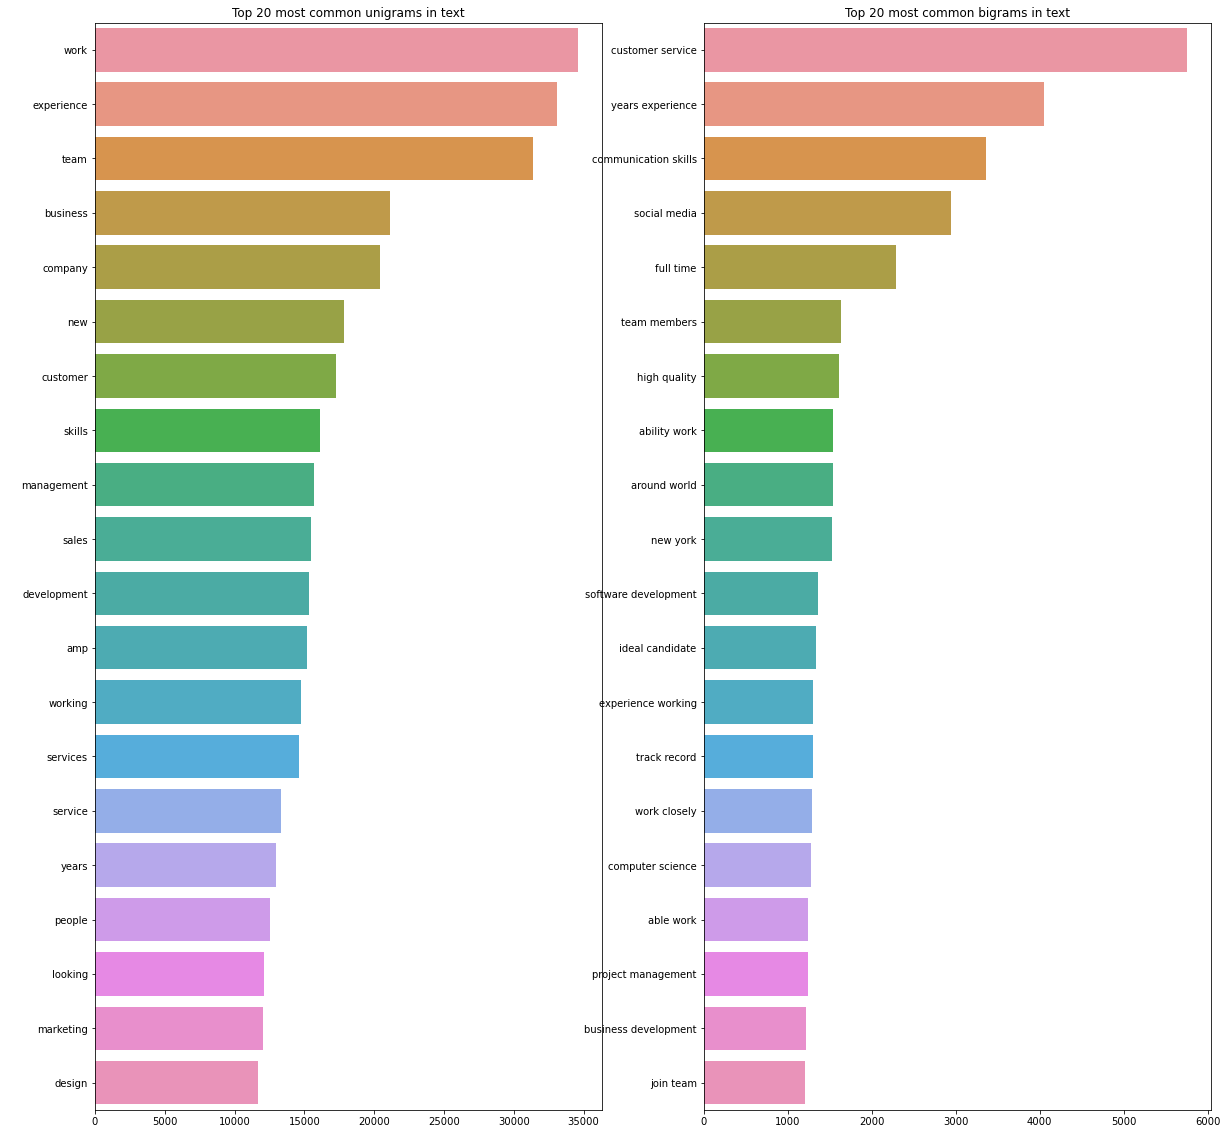

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
def ngrams(corpus, gramrange, n=None):
    vec = CountVectorizer(ngram_range=gramrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

fig, axes = plt.subplots(ncols=2, figsize=(20, 20))

top_unigrams=ngrams(data.text,(1,1))[:20]
x,y=map(list,zip(*top_unigrams))
sns.barplot(x=y,y=x, ax=axes[0])

top_bigrams=ngrams(data.text,(2,2))[:20]
x,y=map(list,zip(*top_bigrams))
sns.barplot(x=y,y=x, ax=axes[1])


axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[0].set_title('Top 20 most common unigrams in text')
axes[1].set_title('Top 20 most common bigrams in text')

plt.show()

Above, we can see the top 20 most common unigram and bigrams

*We can continue the modeling part in the next ipynb, available in the modeling folder.*